In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

국토교통부 실거래가 공개 시스템

2023년 9월 9일 ~ 2024년 9월 8일 1년간 서울시 아파트 실거래가 다운로드(CSV)

https://rt.molit.go.kr/pt/xls/xls.do?mobileAt=

In [ ]:
!wget "https://hycms.hanyang.ac.kr/index.php?module=xn_media_content2013&act=dispXn_media_content2013DownloadContent&content_id=66dd0aa51d289" -O "apt_real.csv"

In [ ]:
data = pd.read_csv('apt_real.csv', quotechar='"', sep=',', skiprows=15, encoding='cp949', dtype='str')
data

In [ ]:
data.dtypes

In [ ]:
data['거래금액(만원)'] = data['거래금액(만원)'].str.replace(',', '')
data['거래금액(만원)'] = data['거래금액(만원)'].astype('int')
data.dtypes

In [ ]:
data = data.rename(columns={'거래금액(만원)' : '거래가'})
data.dtypes

In [ ]:
data['거래가'].describe()

In [ ]:
data['거래가'].hist(bins=100)
plt.show()

In [ ]:
sub_data = data[data['거래가'] < 500000]
print(sub_data.shape[0])
sub_data['거래가'].hist(bins=100)
plt.show()

# **전체 실거래 데이터를 대표하는 모델은 ?**
# .
# .
# .
# .
# .




In [ ]:
import matplotlib.pyplot as plt

# 히스토그램 생성
sub_data['거래가'].hist(bins=100)

# 평균값과 중앙값 계산
mean_value = sub_data['거래가'].mean()
median_value = sub_data['거래가'].median()

# 평균값과 중앙값을 수직선으로 표시
plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
plt.axvline(median_value, color='green', linestyle='--', label='Median')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()


# Total Sum of Squares (TSS)

In [ ]:
# 앞에 50개 데이터 추출
data_50 = sub_data['거래가'].head(50)

# 선 그래프 그리기
plt.plot(data_50.index, data_50.values)

# 평균값 계산
mean_value = sub_data['거래가'].mean()

# 평균선 그리기
plt.axhline(mean_value, color='blue', linestyle='--', label='Mean')

# 평균과 데이터 사이를 붉은색으로 채우기
plt.fill_between(data_50.index, data_50.values, mean_value, color='red', alpha=0.2)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()


In [ ]:
# prompt: sub_data['거래가']의 평균대비 잔차의 TSS 를 구해서 표시해줘

# 평균값 계산
mean_value = sub_data['거래가'].mean()

# 잔차 계산
residuals = sub_data['거래가'] - mean_value

# TSS 계산
TSS = np.sum(residuals ** 2)

# 결과 출력
print("TSS:", format(TSS, ","))


#  
# **정보가 추가된다면?**


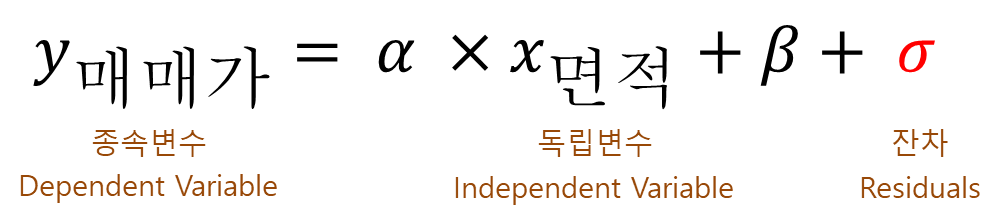

In [ ]:
sub_data = sub_data.rename(columns={'전용면적(㎡)':'면적'})
sub_data['면적'] = sub_data['면적'].astype('float')
sub_data.dtypes

In [ ]:
from sklearn.linear_model import LinearRegression


lm = LinearRegression()

X = np.array(sub_data['면적'].values)
Y = np.array(sub_data['거래가'].values)

X = X[:, np.newaxis]
Y = Y[:, np.newaxis]


lm.fit(X, Y)

print("회귀계수 : " + str(lm.singular_))
print("절편 : " + str(lm.intercept_))


In [ ]:
# 예측값 계산
Y_hat = lm.predict(X)

# 실제값과 예측값을 plot에 표시
plt.scatter(X, Y, color='blue', label='real')
plt.scatter(X, Y_hat, color='orange', label='predict')

# 그래프 제목 및 축 레이블 설정
plt.title('Actual vs Predicted Values')
plt.xlabel('scale')
plt.ylabel('price')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()


# Sum of Squares of Residuals (RSS)

In [ ]:
# 예측값 계산
Y_hat = lm.predict(X)

# 앞에 50개 데이터 추출
data_50 = sub_data['거래가'].head(50)
pred_50 = Y_hat[:50,0]

# 선 그래프 그리기
plt.plot(data_50.index, data_50.values, label='real')
plt.plot(data_50.index, pred_50, label='predict')


# 평균과 데이터 사이를 붉은색으로 채우기
plt.fill_between(data_50.index, data_50.values, pred_50, color='red', alpha=0.2)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()


In [ ]:
# 잔차 계산
residuals = Y - Y_hat

# 잔차의 히스토그램
plt.hist(residuals, bins=100)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


In [ ]:

# 예측값 계산
Y_hat = lm.predict(X)

# 앞에 50개 데이터 추출
data_50 = sub_data['거래가'].head(50)
pred_50 = Y_hat[:50,0]

# 선 그래프 그리기
plt.plot(data_50.index, data_50.values, label='real')
plt.plot(data_50.index, pred_50, label='predict')

# 평균값 계산
mean_value = sub_data['거래가'].mean()

# 평균선 그리기
plt.axhline(mean_value, color='green', linestyle='--', label='Mean')

# 평균과 데이터 사이를 붉은색으로 채우기
plt.fill_between(data_50.index, data_50.values, pred_50, color='red', alpha=0.2)

# 평균과 실제값의 차이를 파란색으로 표기
plt.fill_between(data_50.index, data_50.values, mean_value, color='green', alpha=0.2)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()


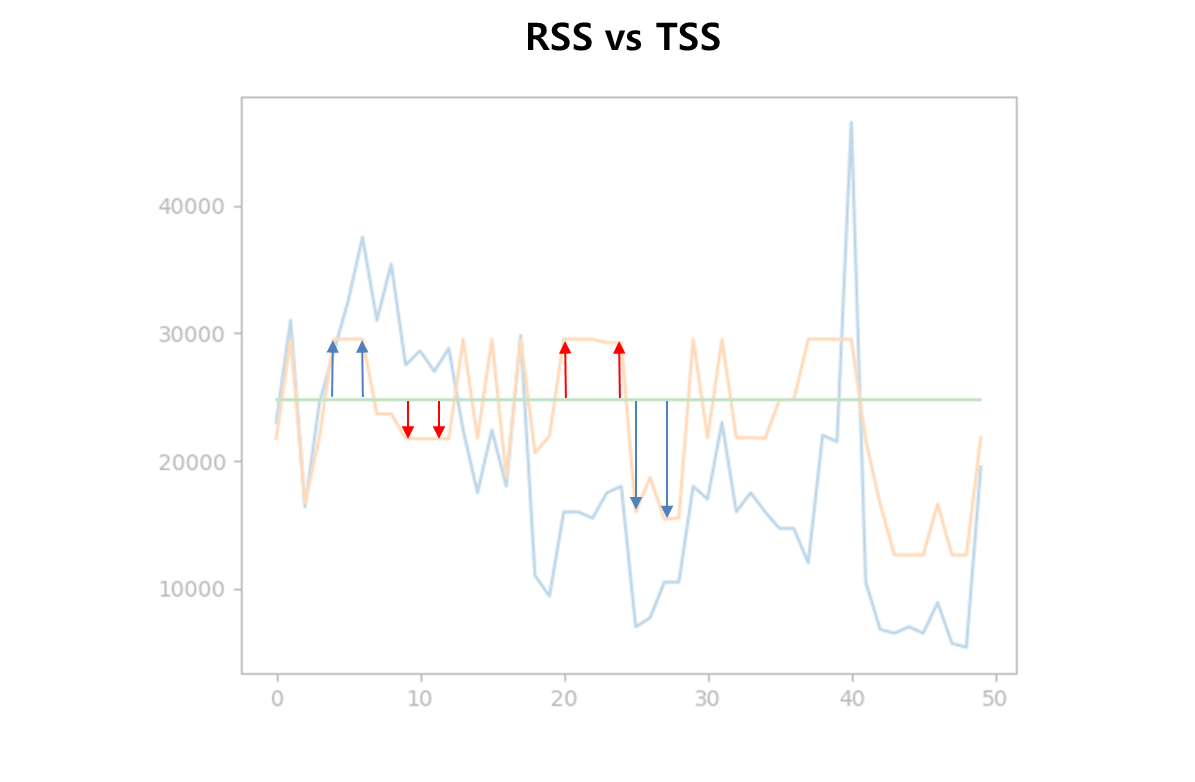

# **R square**

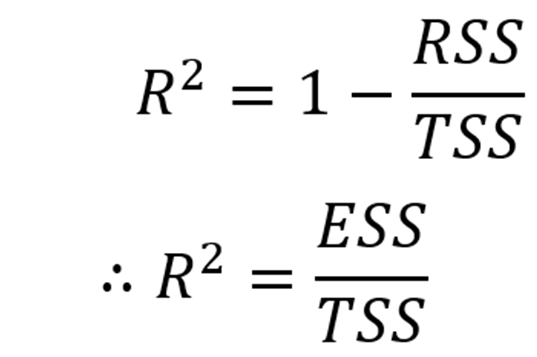

In [ ]:
# TSS 계산
y_mean = np.mean(Y)
TSS = np.sum((Y - y_mean)**2)

# RSS 계산
y_pred = lm.predict(X)
RSS = np.sum((Y - y_pred)**2)

# R-squared 계산
r_squared = 1 - (RSS / TSS)

# 차트 제목 설정
plt.title(f'R-squared: {r_squared:.4f}')

# 나머지 코드는 동일하게 유지

# 예측값 계산
Y_hat = lm.predict(X)

# 앞에 50개 데이터 추출
data_50 = sub_data['거래가'].head(50)
pred_50 = Y_hat[:50,0]

# 선 그래프 그리기
plt.plot(data_50.index, data_50.values, label='real')
plt.plot(data_50.index, pred_50, label='predict')

# 평균값 계산
mean_value = sub_data['거래가'].mean()

# 평균선 그리기
plt.axhline(mean_value, color='green', linestyle='--', label='Mean')

# 평균과 데이터 사이를 붉은색으로 채우기
plt.fill_between(data_50.index, data_50.values, pred_50, color='red', alpha=0.2)

# 평균과 실제값의 차이를 파란색으로 표기
plt.fill_between(data_50.index, data_50.values, mean_value, color='green', alpha=0.2)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()



In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# TSS 계산
y_mean = np.mean(Y)
TSS = np.sum((Y - y_mean)**2)

# RSS 계산
y_pred = lm.predict(X)
RSS = np.sum((Y - y_pred)**2)

# R-squared 계산 (공식)
r_squared_formula = 1 - (RSS / TSS)

# R-squared 계산 (scikit-learn)
r_squared_sklearn = r2_score(Y, y_pred)
r_squared_sklearn_v1 = r_squared_sklearn

# 차이 출력
print(f"R-squared (공식): {r_squared_formula:.4f}")
print(f"R-squared (scikit-learn): {r_squared_sklearn:.4f}")
print(f"차이: {abs(r_squared_formula - r_squared_sklearn):.6f}")

# **데이터가 추가되면 설명력이 올라가네!**

# **그렇다면 정보를 더 주면 좋은 모델이 되겠구나**

In [ ]:
sub_data['건축년도'] = sub_data['건축년도'].astype(int)
sub_data['연한'] = sub_data['건축년도'].apply(lambda x : 2024 - x)
sub_data[['건축년도', '연한']].head(100)

In [ ]:
sub_data['연한'].describe()

In [ ]:
lm = LinearRegression()

X = np.array(sub_data[['면적','연한']].values)
Y = np.array(sub_data['거래가'].values)

X = X[:]
Y = Y[:, np.newaxis]


lm.fit(X, Y)

print("회귀계수 : " + str(lm.singular_))
print("절편 : " + str(lm.intercept_))

Y_hat = lm.predict(X)

In [ ]:
# 예측값 계산
Y_hat = lm.predict(X)

# 실제값과 예측값을 plot에 표시
plt.scatter(X[:,0], Y, color='blue', label='real')
plt.scatter(X[:,0], Y_hat, color='orange', label='predict')

# 그래프 제목 및 축 레이블 설정
plt.title('Actual vs Predicted Values')
plt.xlabel('scale')
plt.ylabel('price')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

In [ ]:
# R-squared 계산 (scikit-learn)
r_squared_sklearn_v2 = r2_score(Y, Y_hat)
r_squared_sklearn_v1

# 차이 출력
print(f"R-squared v1: {r_squared_sklearn_v1:.4f}")
print(f"R-squared v2: {r_squared_sklearn_v2:.4f}")

In [ ]:
sub_data['층'] = sub_data['층'].astype(int)
sub_data['층'].describe()

In [ ]:
sub_data['시군구명'] = sub_data['시군구'].apply(lambda x : x.split(' ')[1])
sub_data['시군구명'].value_counts()

In [ ]:
data_dummies = pd.get_dummies(sub_data['시군구명'] )
data_dummies.head(10)

In [ ]:
sub_data = pd.concat([sub_data, data_dummies], axis=1)
sub_data.head(10)

In [ ]:
sub_data.columns.values

In [ ]:
lm = LinearRegression()

X = np.array(sub_data[['면적','연한', '층', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구',
       '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구',
       '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구',
       '중랑구']].values)
Y = np.array(sub_data['거래가'].values)

X = X[:]
Y = Y[:, np.newaxis]


lm.fit(X, Y)

print("회귀계수 : " + str(lm.singular_))
print("절편 : " + str(lm.intercept_))

Y_hat = lm.predict(X)

In [ ]:
# 예측값 계산
Y_hat = lm.predict(X)

# 실제값과 예측값을 plot에 표시
plt.scatter(X[:,0], Y, color='blue', label='real')
plt.scatter(X[:,0], Y_hat, color='orange', label='predict')

# 그래프 제목 및 축 레이블 설정
plt.title('Actual vs Predicted Values')
plt.xlabel('scale')
plt.ylabel('price')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

In [ ]:
# R-squared 계산 (scikit-learn)
r_squared_sklearn_v3 = r2_score(Y, Y_hat)

# 차이 출력
print(f"R-squared v1: {r_squared_sklearn_v1:.4f}")
print(f"R-squared v2: {r_squared_sklearn_v2:.4f}")
print(f"R-squared v3: {r_squared_sklearn_v3:.4f}")

In [ ]:
import statsmodels.api as sm

X_float = np.array(X, dtype=float)
results = sm.OLS(Y, sm.add_constant(X_float)).fit()
print(results.summary())

In [ ]:
# prompt: X에서 사용된 독립변수들의 다중공선성을 테스트 해줘

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_sub = np.array(X[:,:3], dtype=float)
# 다중공선성 확인
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_sub, i) for i in range(X_sub.shape[1])]
vif["features"] = ['면적','연한', '층']
print(vif)


In [ ]:
import seaborn as sns
vif_data_raw = sub_data[['면적', '연한', '층']]
vif_data_raw.columns = ['scale', 'ages', 'floor']
sns.pairplot(vif_data_raw);

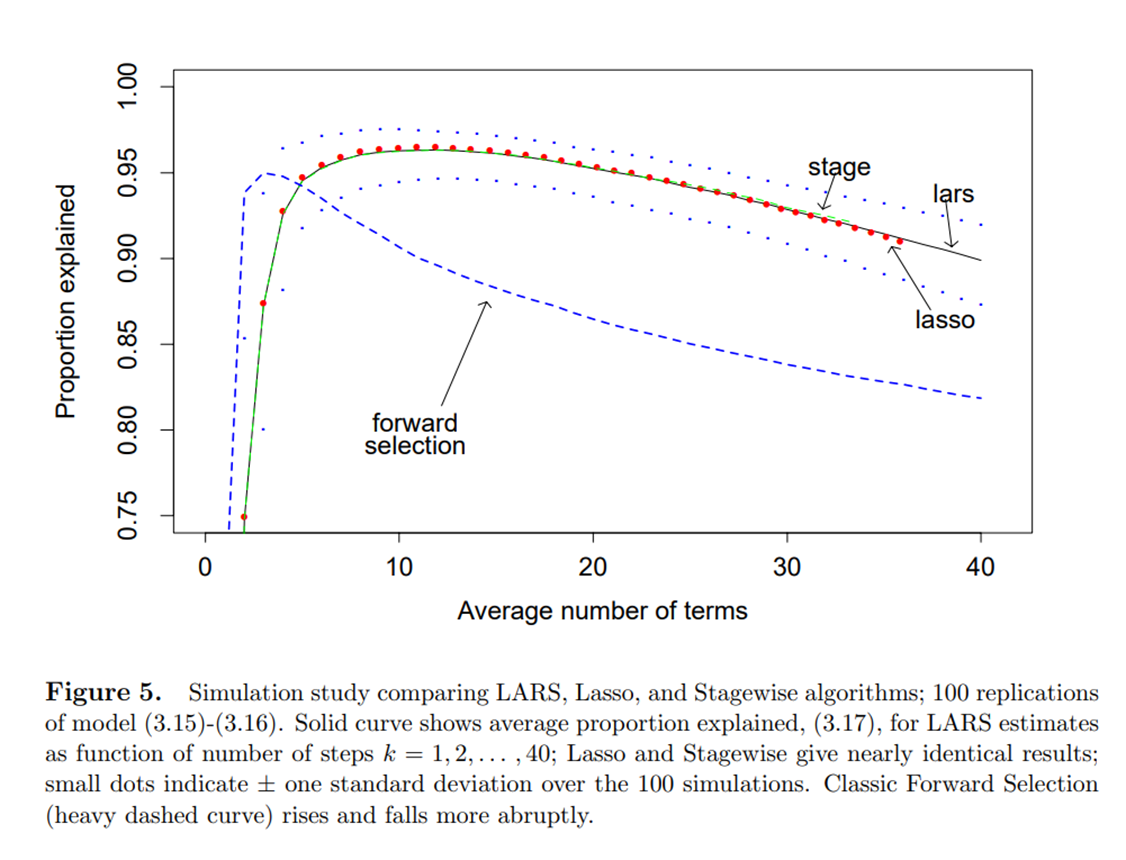